In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
# Load the TSV file, using header=None since there is no header row
df_train = pd.read_csv('ArrowHead_TRAIN.tsv', sep='\t', header=None)
df_test = pd.read_csv('ArrowHead_TEST.tsv', sep='\t', header=None)

In [3]:
#  Separate labels and data of train 
labels_train = df_train.iloc[:, 0].values        
data_train = df_train.iloc[:, 1:]     
print("train Labels shape:", labels_train.shape)
print("train Data shape: ", data_train.shape)

train Labels shape: (36,)
train Data shape:  (36, 251)


In [4]:
#  Separate labels and data of test 
labels_test = df_test.iloc[:, 0].values        
data_test = df_test.iloc[:, 1:]     
print("test Labels shape:", labels_test.shape)
print("test Data shape: ", data_test.shape)

test Labels shape: (175,)
test Data shape:  (175, 251)


In [5]:
#  Verify there are no missing values
print("\nAny missing values in the train dataset?", data_train.isnull().any().any())
print("\nAny missing values in the test dataset?", data_test.isnull().any().any())


Any missing values in the train dataset? False

Any missing values in the test dataset? False


In [6]:
print(data_train.head())
print(data_test.head())

        1         2         3         4         5         6         7    \
0 -1.963009 -1.957825 -1.956145 -1.938289 -1.896657 -1.869857 -1.838705   
1 -1.774571 -1.774036 -1.776586 -1.730749 -1.696268 -1.657377 -1.636227   
2 -1.866021 -1.841991 -1.835025 -1.811902 -1.764390 -1.707687 -1.648280   
3 -2.073758 -2.073301 -2.044607 -2.038346 -1.959043 -1.874494 -1.805619   
4 -1.746255 -1.741263 -1.722741 -1.698640 -1.677223 -1.630356 -1.579440   

        8         9         10   ...       242       243       244       245  \
0 -1.812289 -1.736433 -1.673329  ... -1.583857 -1.655329 -1.719153 -1.750881   
1 -1.609807 -1.543439 -1.486174  ... -1.471688 -1.484666 -1.539972 -1.590150   
2 -1.582643 -1.531502 -1.493609  ... -1.584132 -1.652337 -1.684565 -1.743972   
3 -1.731043 -1.712653 -1.628022  ... -1.678942 -1.743732 -1.819801 -1.858136   
4 -1.551225 -1.473980 -1.459377  ... -1.547111 -1.607101 -1.635137 -1.686346   

        246       247       248       249       250       251  
0 -1

Plotting sample idx = 1


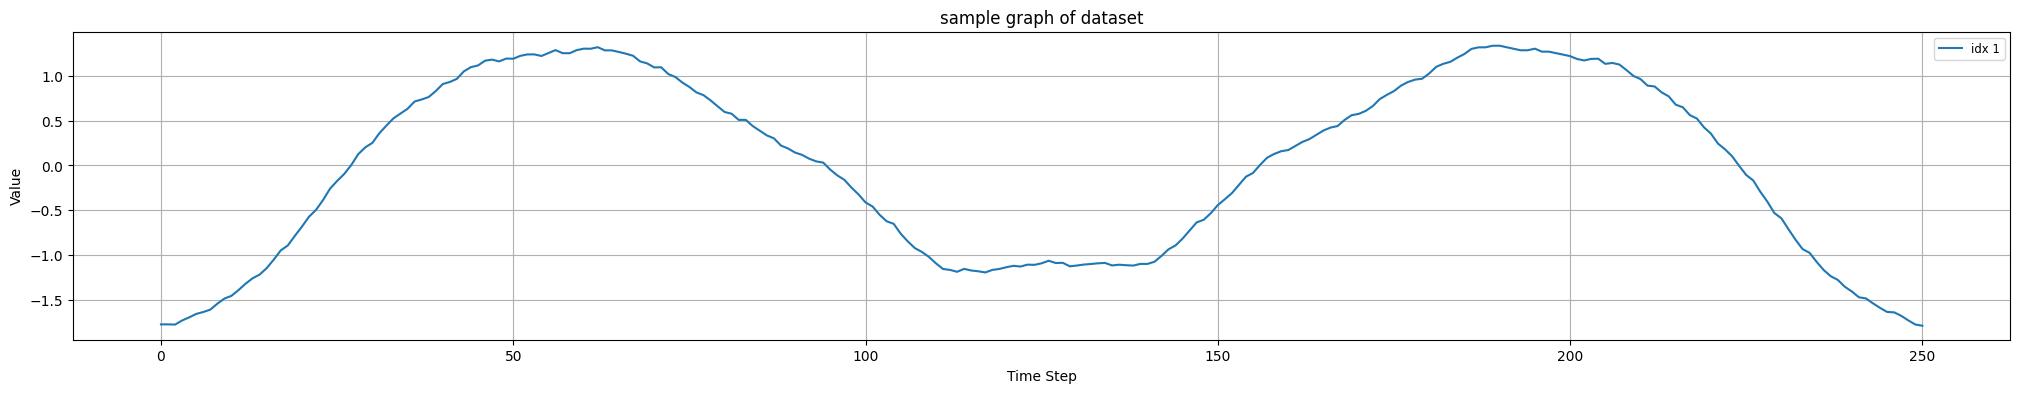

In [7]:
plt.figure(figsize=(25, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 1:
        print(f"Plotting sample idx = {i}")
        plt.plot(data_train.iloc[i].values,label=f"idx {i}")
        count += 1
        if count == 1:
            break
plt.title("sample graph of dataset")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend(loc="upper right", fontsize="small")
plt.grid(True)
plt.show()

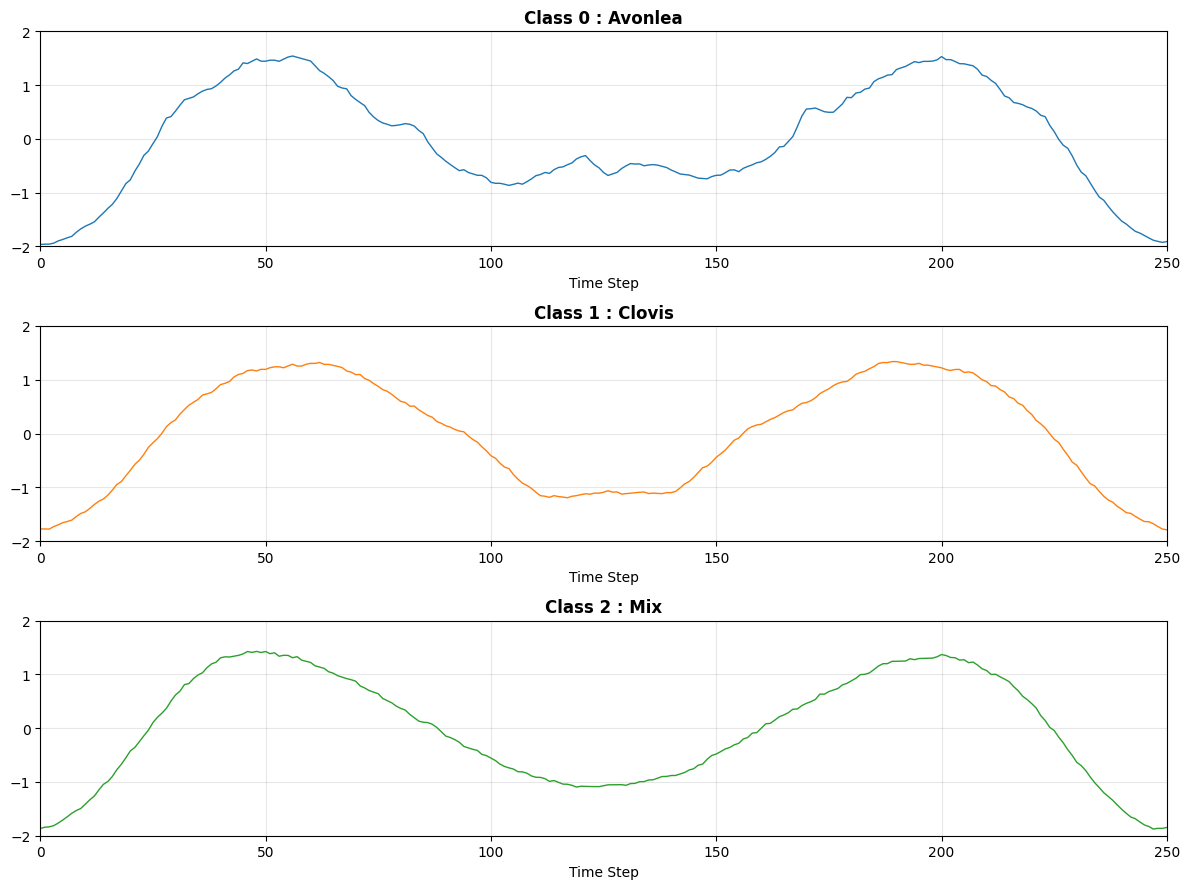

In [22]:
# Map numeric labels (0,1,2) to names
class_names = {
    0: "Avonlea",
    1: "Clovis",
    2: "Mix"
}

colors = plt.cm.tab10.colors
ticks = np.arange(0, 251, 50)  # include 250 on the axis

fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=False)

for cls, ax in zip(range(3), axes):
    # find the first example of this class
    idxs = np.where(labels_train == cls)[0]
    if len(idxs) == 0:
        ax.set_visible(False)
        continue
    idx = idxs[0]
    series = data_train.iloc[idx].values

    # plot
    ax.plot(series, color=colors[cls], linewidth=1)

    # X-axis ticks and labels on every subplot
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_xlim(0, 250)

    # Y-axis symmetric limit
    max_abs = max(abs(series.min()), abs(series.max()))
    y_lim = math.ceil(max_abs) if max_abs <= 5 else math.ceil(max_abs / 5) * 5
    ax.set_ylim(-y_lim, y_lim)

    # Title centered
    ax.set_title(f"Class {cls} : {class_names[cls]}", fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3)

# Add a shared X label underneath all subplots
for ax in axes:
    ax.set_xlabel("Time Step")

plt.tight_layout(h_pad=1.0)
plt.savefig("ArrowHead_graph.pdf", bbox_inches='tight')
plt.show()


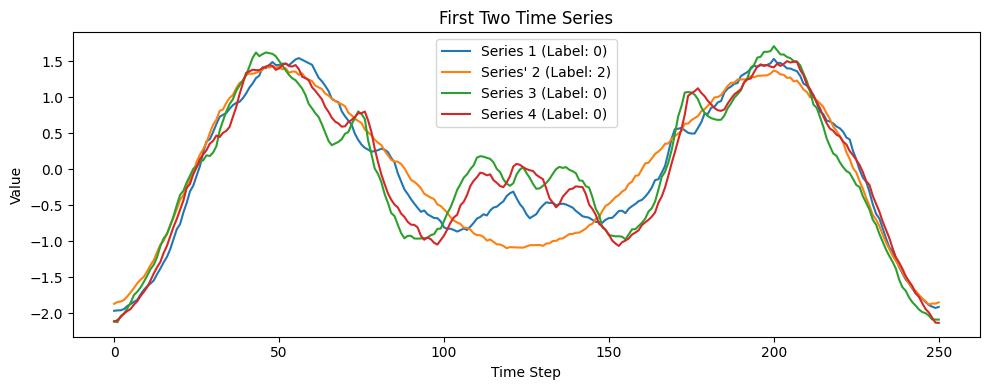

In [18]:
P = data_train.iloc[0].values
q = data_train.iloc[2].values
r = data_train.iloc[12].values
s = data_train.iloc[18].values
first_label = labels_train[0]
second_label = labels_train[2]
third_label = labels_train[12]
fourth_label = labels_train[18]

plt.figure(figsize=(10, 4))
plt.plot(P, label=f"Series 1 (Label: {first_label})")
plt.plot(q, label=f"Series' 2 (Label: {second_label})")
plt.plot(r, label=f"Series 3 (Label: {third_label})")
plt.plot(s, label=f"Series 4 (Label: {fourth_label})")
plt.title("First Two Time Series")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()